In [214]:
# 做完特徵工程前的所有準備
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import copy
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import GradientBoostingClassifier
# # 因為擬合(fit)與編碼(transform)需要分開, 因此不使用.get_dummy, 而採用 sklearn 的 OneHotEncoder
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_curve

data_path = 'D:\CodeProject\ML\\'
df = pd.read_csv(data_path + 'annual-co2-emissions-per-country (1).csv')
df2 = pd.read_csv(data_path + '110-tavg-12-12-1895-2020.csv')

df.head()

,Entity,Code,Year,Annual CO2 emissions
0,Afghanistan,AFG,1949,14656
1,Afghanistan,AFG,1950,84272
2,Afghanistan,AFG,1951,91600
3,Afghanistan,AFG,1952,91600
4,Afghanistan,AFG,1953,106256


In [215]:
df.shape

(23949, 4)

In [216]:
df['Year'] =  df['Year'].astype(int)
df['Annual CO2 emissions'] = df['Annual CO2 emissions'].astype(float)

In [217]:
df = df.loc[df["Year"] >= 1980]

age_data = df[['Year', 'Annual CO2 emissions']]

s = age_data['Annual CO2 emissions'].sum()
num_features = []
data = ['Year', 'Annual CO2 emissions']
dfg= pd.DataFrame(columns= ['Year', 'Annual CO2 emissions'])
for x in range(1980, 2021):

    dfz = age_data.loc[df["Year"] == x]
    ss = dfz['Annual CO2 emissions'].sum()
    dfg = dfg.append({'Year': int(x), 'Annual CO2 emissions':ss}, ignore_index=True)
    # print(ss)
    # num_features.append(ss)
    print("Year: "  + str(x) + "  Total Annual CO2 emissions: " + str(ss))

dfg['Year'] = abs(dfg['Year'])

# for i in age_data:
#     if age_data[i] == '1980':
#         x = age_data['Annual CO2 emissions'].sum()
#         num_features.append(x)
# num_features = []
# for dtype, feature in zip(age_data.dtypes, age_data.columns):
#     if dtype == 'float':
#         num_features.append(feature)
# print(f'{len(num_features)} Numeric Features : {num_features}\n')


Year: 1980  Total Annual CO2 emissions: 76976515724.0
Year: 1981  Total Annual CO2 emissions: 75014306964.0
Year: 1982  Total Annual CO2 emissions: 74497847815.0
Year: 1983  Total Annual CO2 emissions: 74918676782.0
Year: 1984  Total Annual CO2 emissions: 77135656752.0
Year: 1985  Total Annual CO2 emissions: 79876908366.0
Year: 1986  Total Annual CO2 emissions: 80843757464.0
Year: 1987  Total Annual CO2 emissions: 82788031621.0
Year: 1988  Total Annual CO2 emissions: 85631218083.0
Year: 1989  Total Annual CO2 emissions: 86621767754.0
Year: 1990  Total Annual CO2 emissions: 88194825624.0
Year: 1991  Total Annual CO2 emissions: 88759487297.0
Year: 1992  Total Annual CO2 emissions: 86107543538.0
Year: 1993  Total Annual CO2 emissions: 86353214293.0
Year: 1994  Total Annual CO2 emissions: 86236263976.0
Year: 1995  Total Annual CO2 emissions: 87648421404.0
Year: 1996  Total Annual CO2 emissions: 89953573953.0
Year: 1997  Total Annual CO2 emissions: 90055544500.0
Year: 1998  Total Annual CO2

In [218]:
dfg['Annual CO2 emissions'] = dfg['Annual CO2 emissions'] / 1000000000
# dfg.astype('int32')
dfg = abs(dfg)
numbers = df2["Value"]
dfg = dfg.join(numbers)
dfg.head(5)

,Year,Annual CO2 emissions,Value
0,1980.0,76.976516,52.39
1,1981.0,75.014307,53.12
2,1982.0,74.497848,51.34
3,1983.0,74.918677,51.88
4,1984.0,77.135657,51.97


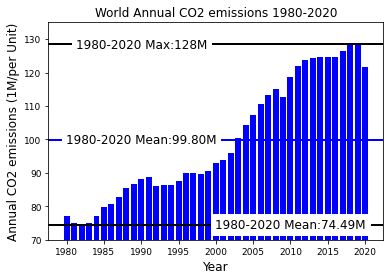

In [219]:
# 以生存年數繪製分布圖
# figure, axis = plt.subplots(1, 1)
xx = dfg['Year']
height = dfg['Annual CO2 emissions']
height2 = dfg['Value']
# widthValue= 0.3

plt.ylim(70,135)
plt.axhline(height.mean(), color='blue', linewidth = 2)
plt.axhline(height.max(), color='black', linewidth = 2)
plt.axhline(height.min(), color='black', linewidth = 2)
plt.text(1990, height.mean(), '1980-2020 Mean:99.80M', fontsize=12, va='center', ha='center', backgroundcolor='w')
plt.text(2010, height.min(), '1980-2020 Mean:74.49M', fontsize=12, va='center', ha='center', backgroundcolor='w')
plt.text(1990, height.max(), '1980-2020 Max:128M', fontsize=12, va='center', ha='center', backgroundcolor='w')

plt.bar(xx, height, color='b')
# plt.bar(xx+0.3, height2, width= widthValue , color='r')
plt.title('World Annual CO2 emissions 1980-2020')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Annual CO2 emissions (1M/per Unit)', fontsize = 12)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
# plt.xaxis_date()
# plt.autoscale(tight=True)
# plt.grid(linestyle= '-.', linewidth = 0.3)
plt.savefig('D:\\MS\\World Annual CO2 emissions.png', dpi = 600)
plt.show()

# https://stackoverflow.com/questions/27709992/average-line-for-bar-chart-in-matplotlib
    
# # 改變繪圖樣式 (style)
# plt.style.use('ggplot')
#
# # 改變樣式後再繪圖一次, 比較效果
# plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
# plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
# plt.show()

In [220]:
height.describe()

count     41.000000
mean      99.802436
std       18.197240
min       74.497848
25%       86.236264
50%       92.998025
75%      118.593919
max      128.452535
Name: Annual CO2 emissions, dtype: float64

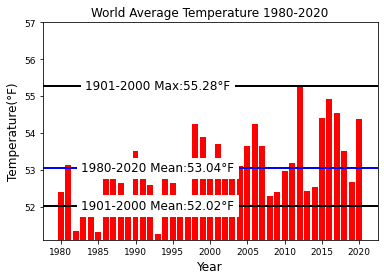

In [221]:
plt.ylim(51.1,57)
plt.axhline(height2.mean(), color='blue', linewidth = 2)
plt.text(1993, height2.mean(), '1980-2020 Mean:53.04°F', fontsize=12, va='center', ha='center', backgroundcolor='w')
plt.text(1993, 52.02, '1901-2000 Mean:52.02°F', fontsize=12, va='center', ha='center', backgroundcolor='w')
plt.text(1993, height2.max(), '1901-2000 Max:55.28°F', fontsize=12, va='center', ha='center', backgroundcolor='w')

plt.axhline(52.02, color='black', linewidth = 2)
plt.axhline(55.28, color='black', linewidth = 2)

plt.bar(xx, height2, color = 'r')

# plt.bar(xx+0.3, height2, width= widthValue , color='r')
plt.title('World Average Temperature 1980-2020')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Temperature(°F)', fontsize = 12)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.savefig('D:\\MS\\World Average Temperature 1980-2020.png', dpi = 600)

# plt.xaxis_date()
# plt.autoscale(tight=True)
# plt.grid(linestyle= '-.', linewidth = 0.3)
plt.show()

In [222]:
height2.describe()

count    41.000000
mean     53.047805
std       0.971464
min      51.260000
25%      52.390000
50%      53.120000
75%      53.640000
max      55.280000
Name: Value, dtype: float64